# EECS 16A Spring 2021 Homework 12

In [1]:
from __future__ import division
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


##  Mechanical Least Squares - Optional IPython code for plotting

In [2]:
# use for plotting
a = np.array([2,4,6,8])
b = np.array([2,6,7,8])

### Part (a)

In [3]:
# find a linear model of the form:   b = xa
# According to the least squares formula, we can calculate x
# xhat =(a.T*a)^(-1)*a.T*b
xhat = (1/np.dot(a,a))*np.dot(a,b)
print('xhat: '+str(xhat))
bhat = a*xhat

# Calculate squared error
se = np.dot(b-bhat,b-bhat)
print('the squared error is '+str(se))

xhat: 1.1166666666666667
the squared error is 3.3666666666666663


Notice that the fit is okay but could be made better if we added a b-intercept.


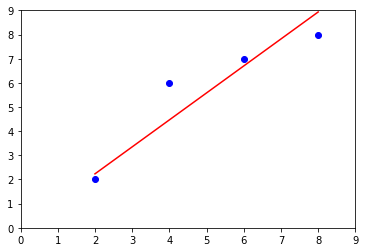

In [4]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a,b,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a,bhat,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);

print('Notice that the fit is okay but could be made better if we added a b-intercept.')

### Part (b)

In [5]:
# The augmented A matrix is given by
a2 = a.copy()
b2 = b.copy()
A2 = np.vstack([a2,np.ones(len(a2))]).T
print('The augmented A matrix is')
print(A2)
# by the least squares formula we can calculate xhat
xhat2 = np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,b2))
print('xhat:')
print(xhat2)
# The squared error is given by
bhat2 = np.dot(A2,xhat2)
se2 = np.dot(b2 - bhat2,b2-bhat2)
print('the squared error is '+str(se2))

The augmented A matrix is
[[2. 1.]
 [4. 1.]
 [6. 1.]
 [8. 1.]]
xhat:
[0.95 1.  ]
the squared error is 2.7


By adding a b-intercept we have definitely improved the fit.
This can be seen in the graph as well as the value of the squared error


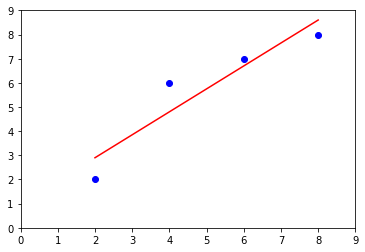

In [6]:
#HERE IS HOW TO PLOT POINTS
plt.plot(a2,b2,'ob') 
#HERE IS HOW TO PLOT A LINE
plt.plot(a2,bhat2,'-r')
#HERE IS HOW TO CHANGE THE LIMITS OF THE PLOTTING WINDOW
plt.xlim([0,9]); plt.ylim([0,9]);
print('By adding a b-intercept we have definitely improved the fit.')
print('This can be seen in the graph as well as the value of the squared error')

##  GPS Receivers

In [7]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [8]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

<StemContainer object of 3 artists>

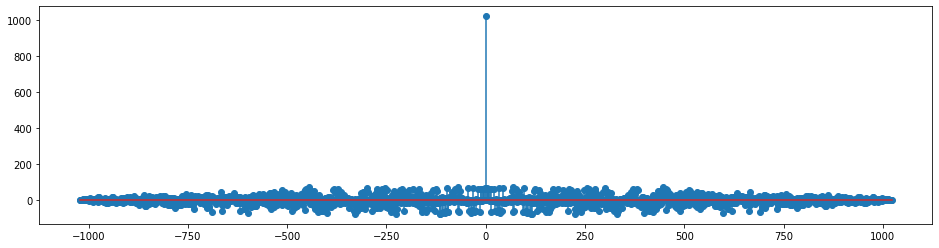

In [9]:
## PART A CODE HERE
def array_correlation(array1,array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    """
    ## Use np.correlate with "FULL". Check out the helper page for it 
    correlated_array = np.correlate(array1,array2,'full')
    length1 = len(array1)
    length2 = len(array2)
    min_ind = min(length1,length2)
    max_ind = max(length1,length2)
    indices = np.linspace(-min_ind + 1, max_ind - 1, min_ind + max_ind -1)
    return (indices, correlated_array)

# Plot the auto-correlation of satellite 10 with itself.
array_10 = Gold_code_satellite(10)
(ind_10, self_10) = array_correlation(array_10,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_10,self_10)

### Part (b)

<StemContainer object of 3 artists>

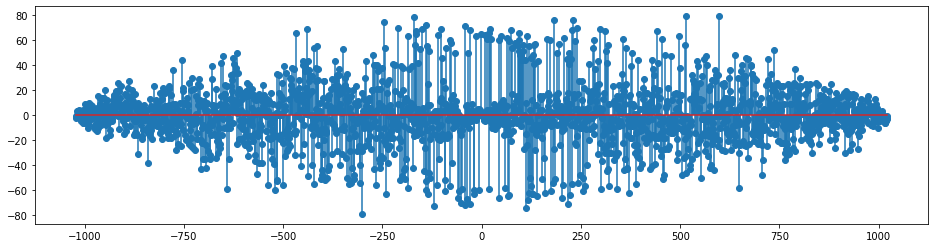

In [10]:
## PART B CODE HERE
array_13 = Gold_code_satellite(13)
(ind_10_13, cross_10_13) = array_correlation(array_10,array_13)
plt.figure(figsize=(16,4))
plt.stem(ind_10_13,cross_10_13)

### Part (c)

<StemContainer object of 3 artists>

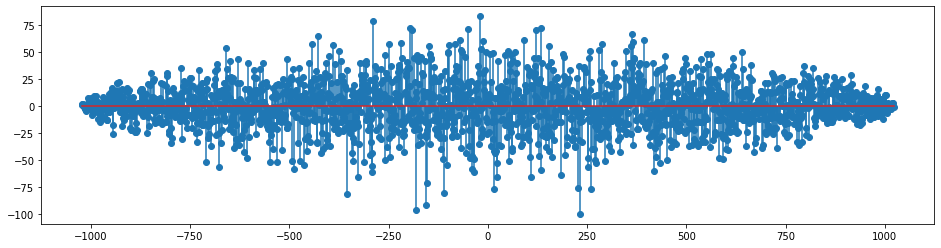

In [11]:
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2,size = length_of_noise)
    noise_array = 2*noise_array - np.ones(size(noise_array))
    return noise_array

## PART C CODE HERE
intrand_signal = integernoise_generator(1023)
(ind_intrand,cross_intrand) =array_correlation(intrand_signal, array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_intrand,cross_intrand)

### Part (d)

<StemContainer object of 3 artists>

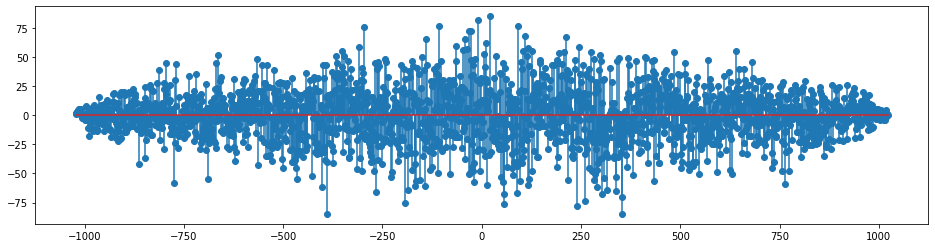

In [12]:
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0,1,length_of_noise)
    return noise_array

## PART D CODE HERE
gaussrand_signal = gaussiannoise_generator(1023)
(ind_gaussrand,cross_gaussrand) =array_correlation(gaussrand_signal,array_10)
plt.figure(figsize=(16,4))
plt.stem(ind_gaussrand,cross_gaussrand)

### Part (e)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions too.

In [13]:
## PART E CODE HERE
## This function returns a 1 if peak (greater than threshold or less than -threshold) is found else it returns a 0.
def find_peak(correlation,threshold):
    max_value = np.amax(correlation)
    min_value = np.amin(correlation)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1*threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value

## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
signal1 = np.load('data1.npy')
visible_sat_e = np.zeros(24)
thresh = 800

for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(signal1, gold_code)
    visible_sat_e[sat_ID-1] = find_peak(correlation,thresh)
    if find_peak(correlation, thresh):
        visible_sat_e[sat_ID - 1] = 1
        print('Visible:',sat_ID)

print(visible_sat_e) # positions of 1's indicate the number of the satellite present.
print('Visible:', np.argwhere(visible_sat_e)[:,0]+1)
## The satellites that are present are 4, 7, 13, 19

Visible: 4
Visible: 7
Visible: 13
Visible: 19
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Visible: [ 4  7 13 19]


### Part (f)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions/ use a manual process.

Visible: [3]
Timestamps for 1s [[ 253.]
 [4345.]]
Timestamps for -1s [[1276.]
 [2299.]
 [3322.]]


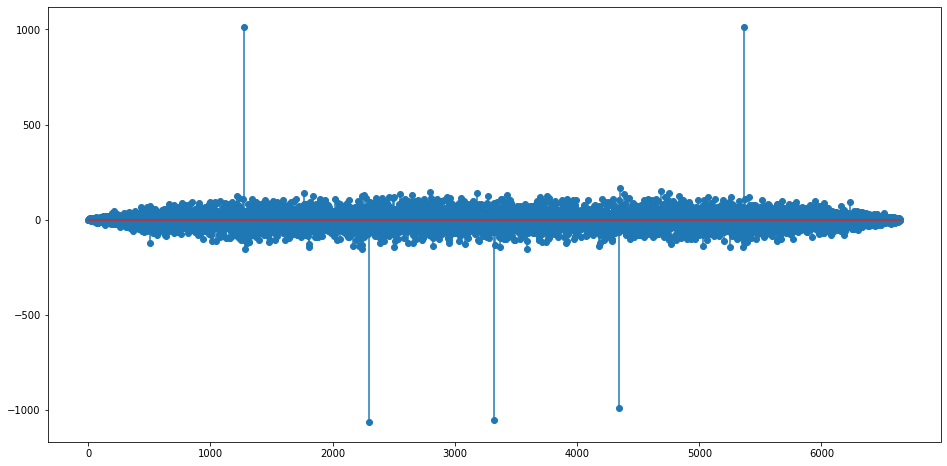

In [14]:
## USE DATA2.NPY AS THE SIGNAL ARRAY
signal2 = np.load('data2.npy')
visible_sat_f = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(signal2,gold_code)
    visible_sat_f[sat_ID-1] = find_peak(correlation,thresh)

print('Visible:',np.argwhere(visible_sat_f)[:,0]+1)

## Satellite visible is satellite 3. Let's now proceed to find the data
array_3 = Gold_code_satellite(3)
(ind_3,sat3_data) = array_correlation(signal2,array_3)
plt.figure(figsize=(16,8))
plt.stem(sat3_data)
## This tells us visually that the data is 1, -1, -1, -1, 1


## Another way to do this (optional) is as follows

## Find all 1s:
print('Timestamps for 1s',ind_3[np.argwhere(sat3_data > thresh)])

## Find all -1s:
print('Timestamps for -1s',ind_3[np.argwhere(sat3_data < -1 * thresh)])

## This again tells us that the data is 1, -1, -1, -1, 1

### Part (g)
Hint: You can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. 

Hint: np.argwhere may be useful for detecting satellites with peaks. You can use other functions/ use a manual process.

Visible: [ 5 20]
Delay for Satellite 5: 253.0
Delay for Satellite 20: 506.0


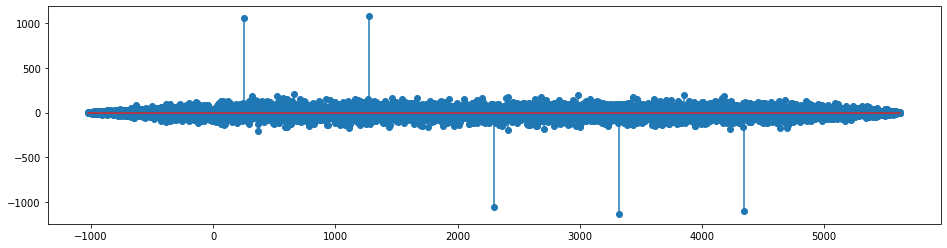

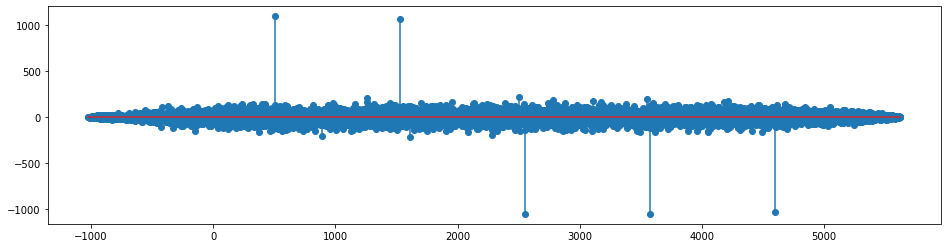

In [15]:
## USE DATA3.NPY AS THE SIGNAL ARRAY
signal3 = np.load('data3.npy')
visible_sat_g = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code,signal3)
    visible_sat_g[sat_ID-1] = find_peak(correlation,thresh)

print('Visible:',np.argwhere(visible_sat_g)[:,0]+1)
## This tells us that the satellites present in this data are 5 and 20. 


array_5 = Gold_code_satellite(5)
array_20 = Gold_code_satellite(20)
(ind_5,sat5_data) = array_correlation(signal3,array_5)
(ind_20,sat20_data) = array_correlation(signal3,array_20)

plt.figure(figsize=(16,4))
plt.stem(ind_5,sat5_data)

plt.figure(figsize=(16,4))
plt.stem(ind_20,sat20_data)

## As we know that the data is 1, 1, -1, -1, -1; we just find the positions of 1s in both the satellite correlations
print('Delay for Satellite 5:', np.min(ind_5[np.argwhere(sat5_data>thresh)]))
print('Delay for Satellite 20:',np.min(ind_20[np.argwhere(sat20_data>thresh)]))

## Audio File Matching

This notebook continues the audio file matching problem. Be sure to have song.wav and clip.wav in the same directory as the notebook.

In this notebook, we will look at the problem of searching for a small audio clip inside a song.

The song "Mandelbrot Set" by Jonathan Coulton is licensed under <a href="http://creativecommons.org/licenses/by-nc/3.0/">CC BY-NC 3.0</a>

If you have trouble playing the audio file in IPython, try opening it in a different browser. I encountered problem with Safari but Chrome works for me.

### Setup

In [1]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile
import operator
from IPython.display import Audio
%matplotlib inline

given_file = 'song.wav'
target_file = 'clip.wav'
rate_given,  given_signal  = scipy.io.wavfile.read(given_file)
rate_target, target_signal = scipy.io.wavfile.read(target_file)
given_signal  = given_signal[:2000000].astype(float)
target_signal = target_signal.astype(float)
def play_clip(start, end, signal=given_signal):
    scipy.io.wavfile.write('temp.wav', rate_given, signal[start:end].astype(np.int16))
    return Audio(url='temp.wav', autoplay=False)

def run_comparison(target_signal, given_signal, idxs=None):
    # Run everything if not called with idxs set to something
    if idxs is None:
        idxs = [i for i in range(len(given_signal)-len(target_signal))]
    return idxs, [vector_compare(target_signal, given_signal[i:i+len(target_signal)])
                for i in idxs]

play_clip(0, len(given_signal))

#scipy.io.wavfile.write(target_file, rate_given, (-0.125*given_signal[1380000:1380000+70000]).astype(np.int16))

We will load the song into the variable `given_signal` and load the short clip into the variable `target_signal`. Your job is to finish code that will identify the short clip's location in the song. The clip we are trying to find will play after executing the following block.

In [2]:
Audio(url=target_file, autoplay=False)

### Part (e)
Your task is to define the function 'vector_compare' and run the following code. Because the song has a lot of data, you should use the provided examples from the previous parts of the problem before running the later code. Do you results here make sense given your answers to previous parts of the problem?

In [5]:
def vector_compare(desired_vec, test_vec):
    """This function compares two vectors, returning a number.
    The test vector with the highest return value is regarded as being closest to the desired vector."""
    return np.dot(desired_vec.T, test_vec)/(np.linalg.norm(desired_vec)*np.linalg.norm(test_vec)+1.e-10)

print("Vector compare test examples:")
print(vector_compare(np.array([1,1,1]), np.array([1,1,1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,-1,-1])))
print(vector_compare(np.array([1,1,1]), np.array([-1,1,-1])))

Vector compare test examples:
0.9999999999666668
-0.9999999999666668
-0.33333333332222226


Run the following code that runs `vector_compare` on every subsequence in the song- it will probably take at least 5 minutes. How do you interpret this plot to find where the clip is in the song?

That took 11.64 minutes to run


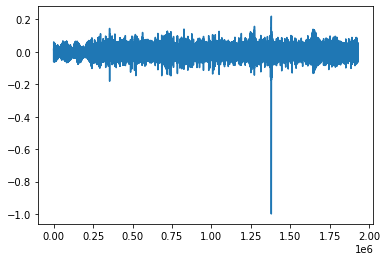

In [6]:
import time

t0 = time.time()
idxs, song_compare = run_comparison(target_signal, given_signal)
t1 = time.time()
plt.plot(idxs, song_compare)
print ("That took %(time).2f minutes to run" % {'time':(t1-t0)/60.0} )

In the space below, write code that uses `song_compare` to print the index of `given_signal` where `target_signal` begins. Then, verify that your answer is correct by playing the song at that index using the `play_clip` function.

In [7]:
index, value = max(enumerate([abs(i) for i in song_compare]), key=operator.itemgetter(1))
print (index)
play_clip(index,index+len(target_signal))

1380000
